## DIABETES PREDICTION PROJECT


![My Image](Dbimage.png)


### Project Description

The main aim of this project is to analyse the diabetes dataset, handle missing values and build a machine learning model such as the Random Forest to help classify and predict if a patient has diabetes or not.

The Dataset is downloaded from kaggle.

In [27]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('whitegrid')

In [28]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### DATASET OVERVIEW

In [29]:
#shape of dataset

df.shape

(768, 9)

In [30]:
#information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Information about dataset attributes -

- Pregnancies: To express the Number of pregnancies

- Glucose: To express the Glucose level in blood

- BloodPressure: To express the Blood pressure measurement

- SkinThickness: To express the thickness of the skin

- Insulin: To express the Insulin level in blood

- BMI: To express the Body mass index

- DiabetesPedigreeFunction: To express the Diabetes percentage

- Age: To express the age

- Outcome: To express the final result 1 is Yes and 0 is No

In [31]:
#check for duplicates

df.duplicated().sum()

0

In [32]:
#check statistics of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Looking at the statistics of the dataset, the min values of Glucose, BloodPressure, SkinThickness, Insulin, BMI cannot be 0 realistically, so this is a case that has to be dealt with.

In [33]:
#Check for missing values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### EXPLORATORY DATA ANALYSIS(EDA)

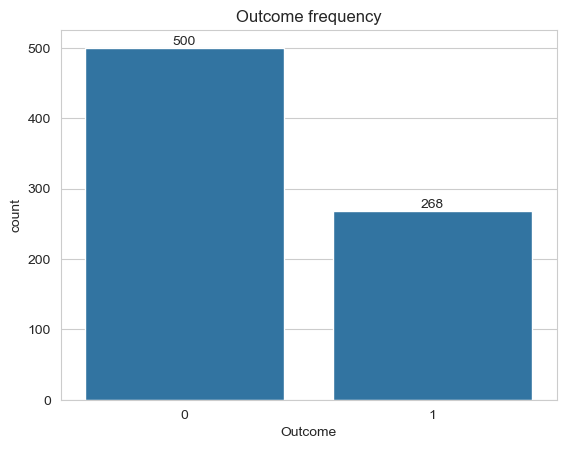

In [34]:
#Visualize the outcome column

plot = sns.countplot(x= df['Outcome'])
for bar in plot.containers:
    plot.bar_label(bar)
plt.title('Outcome frequency')
plt.show()

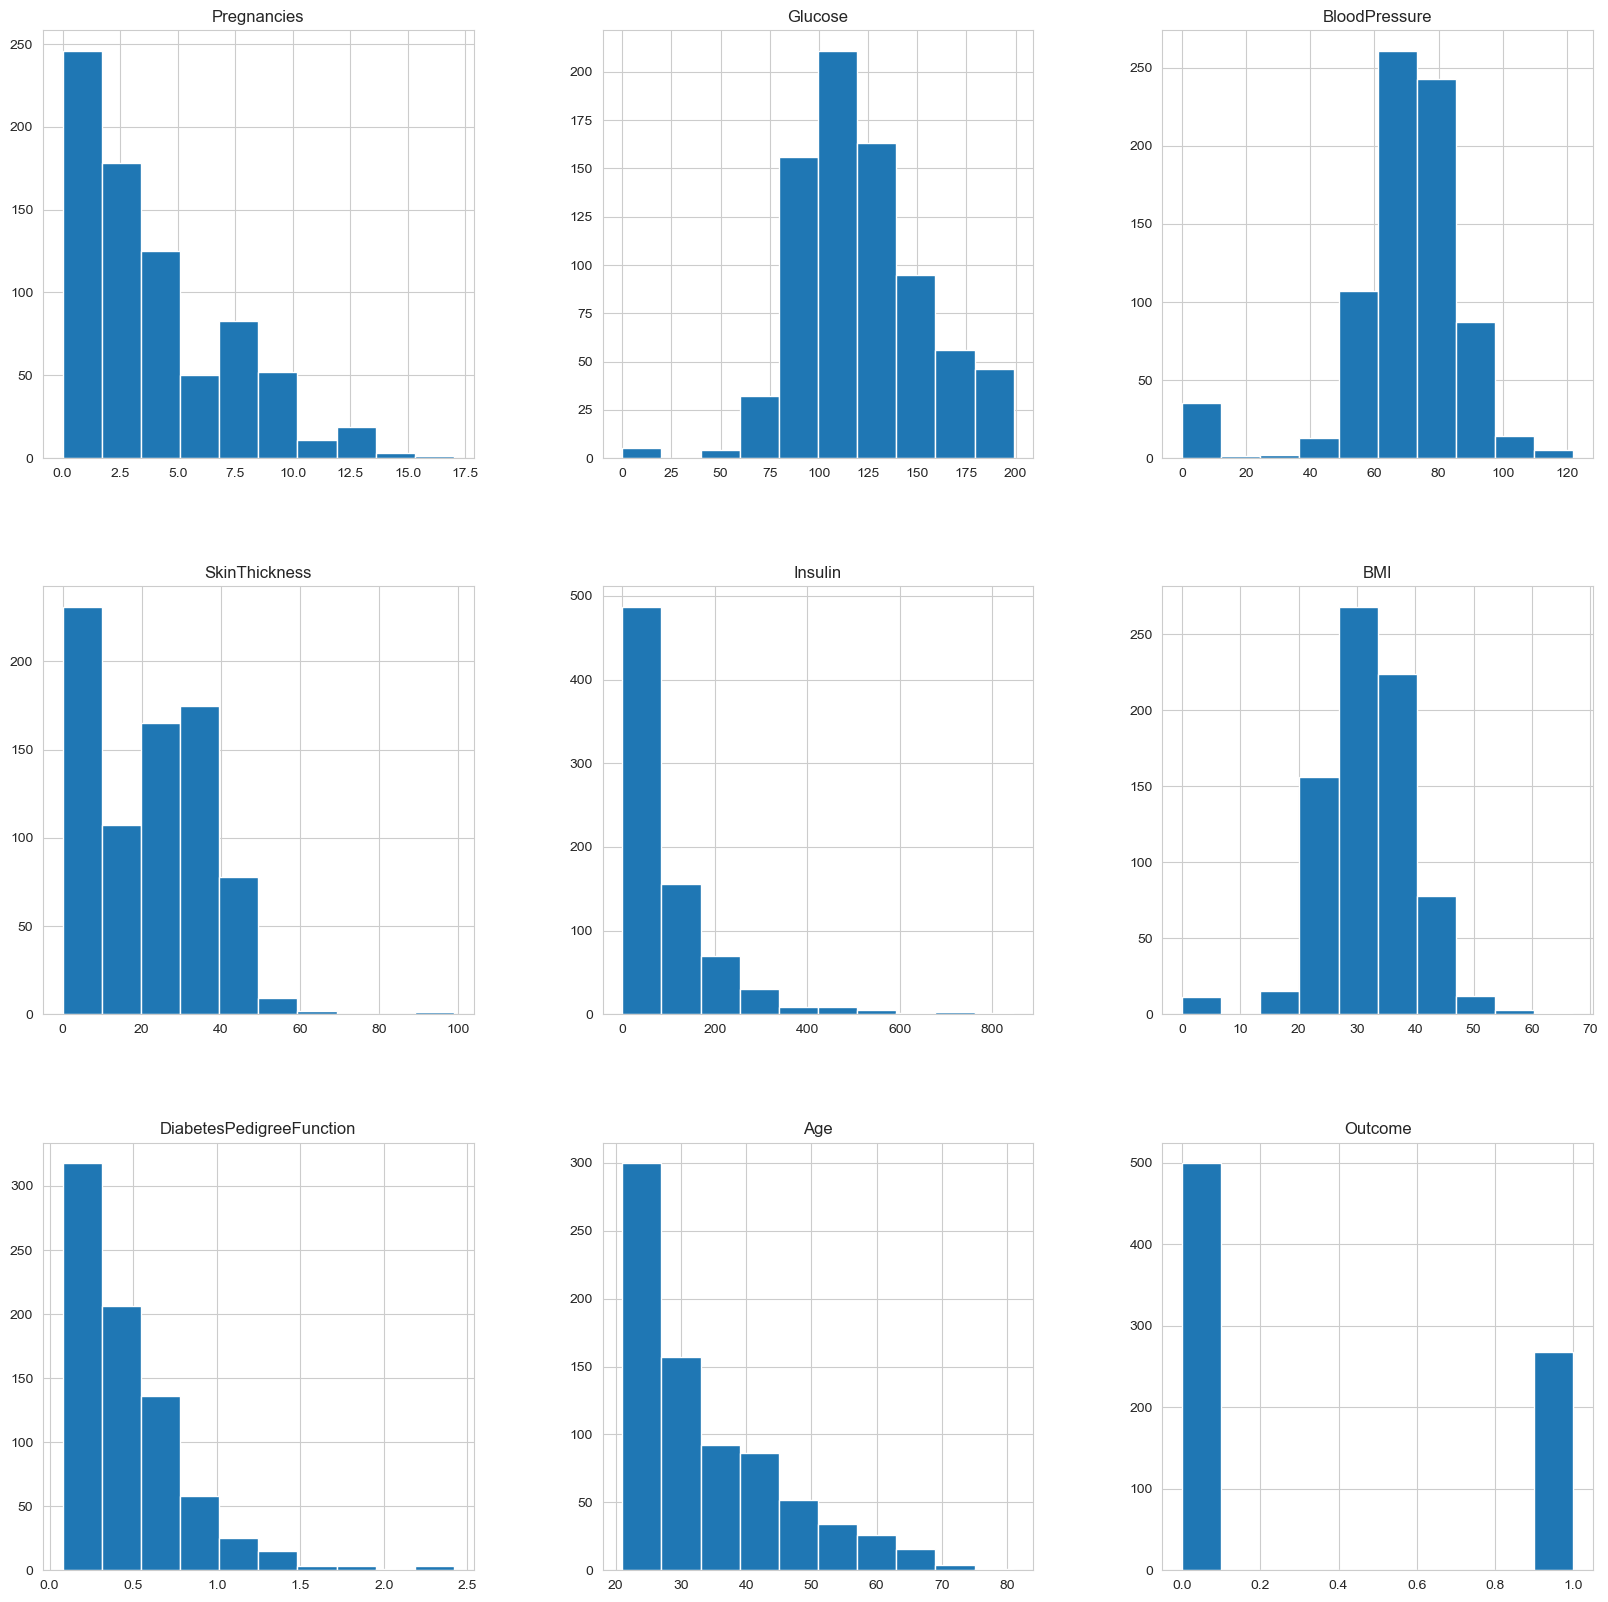

In [35]:
#Check distribution of each column in the dataset

df.hist(figsize=(20,20))
plt.show()

### HANDLING ZERO VALUES

In [36]:
#check for where 0 is present in each column

print(df[df['Glucose'] == 0].shape[0])
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])
print(df[df['BMI'] == 0].shape[0])

5
35
227
374
11


Some of the columns have a skewed distribution, so the mean is affected by outliers than the median. Glucose and Blood Pressure have normal distribution hence we replace 0 values in those columns by mean values. SkinThickness, Insulin and BMI have skewed distribution hence median is a better choice as it is less affected by outliers.

In [37]:
#Handling Zero Values

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [38]:
num_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

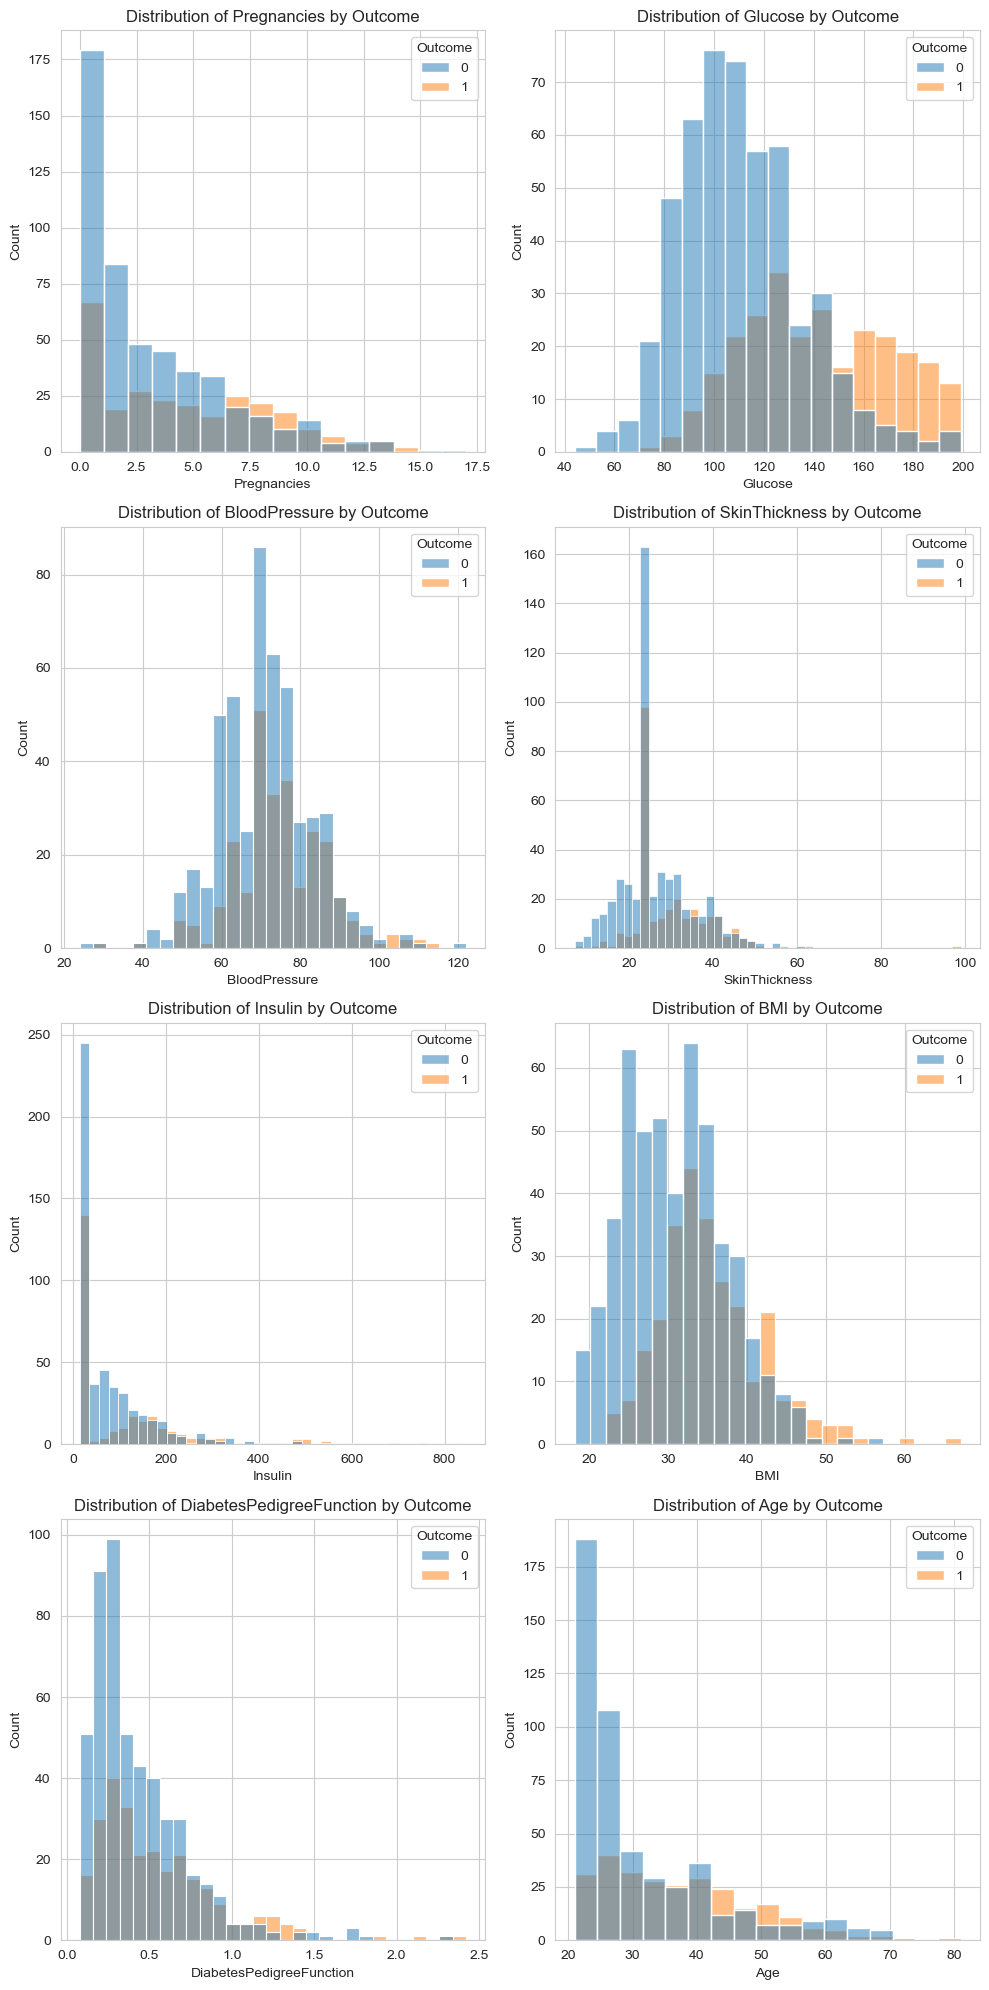

In [39]:
#Visualize columns in respect to the outcome.

# Number of rows needed (assuming you want 2 histograms per row)
nrows = (len(num_col) + 1) // 2  # this will round up the division

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows * 5))

# Flatten axes array to make it easier to iterate over
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df, x=col, hue=df['Outcome'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Outcome')

# Hide any unused subplots if there are an odd number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


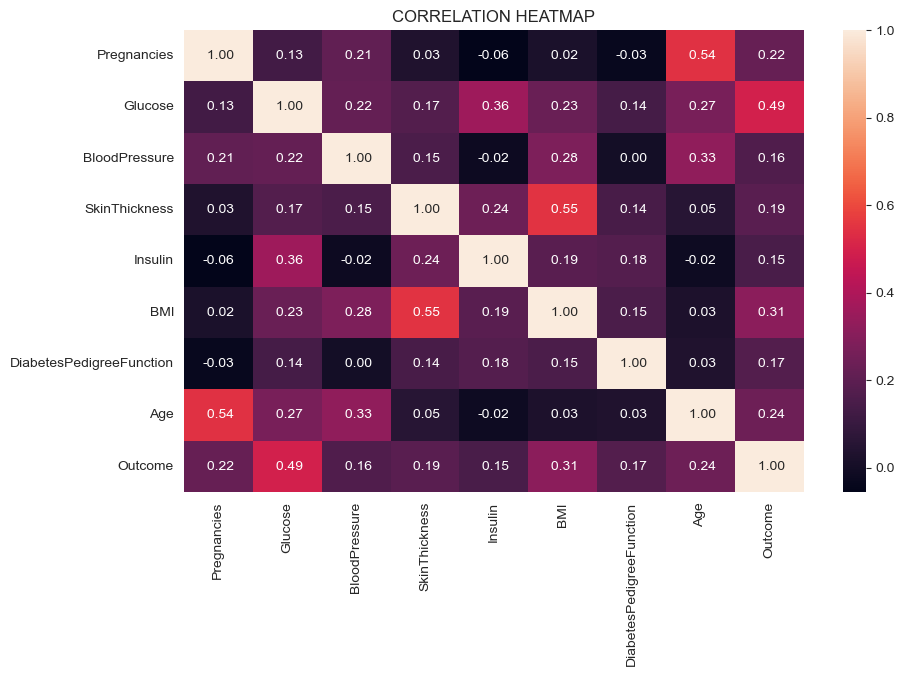

In [40]:
#correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=' .2f')
plt.title('CORRELATION HEATMAP')
plt.show()

### Data Preparation

In [41]:
#Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Outcome'])), columns=df.columns[:-1])

In [42]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,-0.469981,-0.608201,-0.342155,-0.371101,1.170732


In [43]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

### Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions
train_pred = lr.predict(X_train)  #prediction on training set
test_pred = lr.predict(X_test)    #Prediction on test set

#Accuracy scores
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)

print('Train Set Accuracy: ', train_acc * 100)
print('Test Set Accuracy: ', test_acc * 100)

print()

#Confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test,test_pred))
print('Classification Report:\n', classification_report(y_test,test_pred))





Train Set Accuracy:  79.47882736156352
Test Set Accuracy:  70.77922077922078

Confusion Matrix:
 [[82 18]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



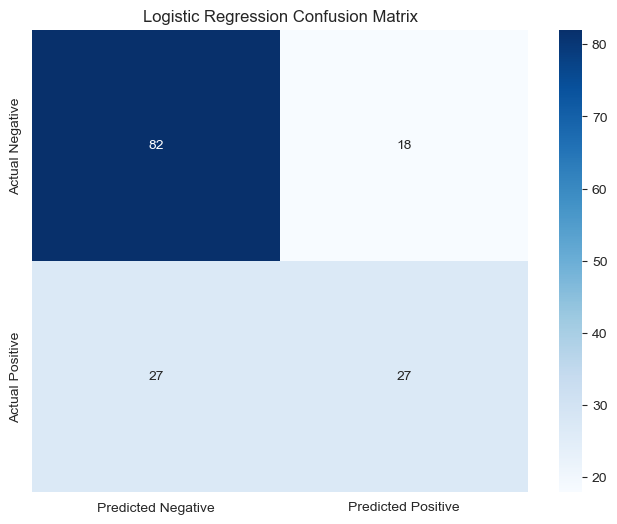

In [47]:
#Visualize the Logistic Regression confusion matrix

#convert to matrix
conf_matrix = np.array([[82, 18], [27,27]])

#convert to dataframe
df_cm = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### K Nearest Neighbor Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

#predictions
k_train_pred = knn.predict(X_train)
k_test_pred = knn.predict(X_test)

#Accuracy scores
k_train_acc = accuracy_score(y_train,k_train_pred)
k_test_acc = accuracy_score(y_test, k_test_pred)

print('Train Set Accuracy: ', k_train_acc * 100)
print('Test Set Accuracy: ', k_test_acc * 100)

print()

#Confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test,k_test_pred))
print('Classification Report:\n', classification_report(y_test,k_test_pred))



Train Set Accuracy:  82.73615635179154
Test Set Accuracy:  71.42857142857143

Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



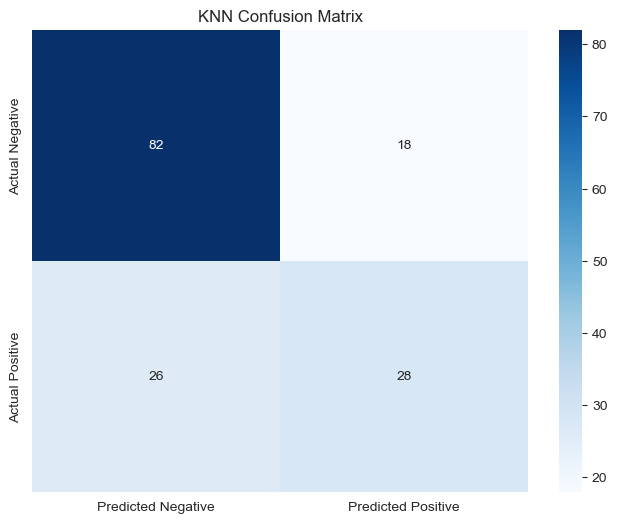

In [49]:
#Visualize the confusion matrix

#convert to matrix
knn_matrix = np.array([[82,18], [26,28]])

#convert to dataframe
km_df = pd.DataFrame(knn_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(km_df, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

### Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20 ,30],
    'min_samples_split': [2, 5, 10]
}

#Perform gridsearch with cross validation
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

#get the best estimator
print('Best param: ', grid.best_params_)
rfc = grid.best_estimator_

#predictions
rf_train_pred = rfc.predict(X_train)
rf_test_pred = rfc.predict(X_test)

#Accuracy score
rf_train_acc = accuracy_score(y_train,rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print('Train Set Accuracy: ', rf_train_acc * 100)
print('Test Set Accuracy: ', rf_test_acc * 100)
print()

#Confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test,rf_test_pred))
print('Classification Report:\n', classification_report(y_test,rf_test_pred))




Best param:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Train Set Accuracy:  93.15960912052117
Test Set Accuracy:  76.62337662337663

Confusion Matrix:
 [[83 17]
 [19 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.65      0.66        54

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



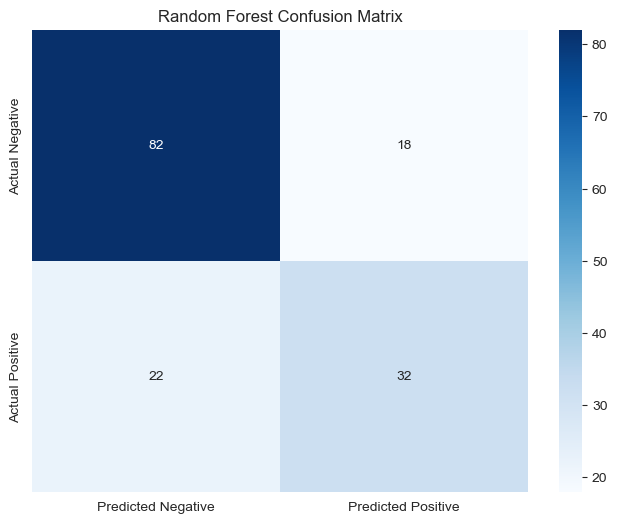

In [51]:
#visualize the confusion matrix

#convert to matrix
rf_matrix = np.array([[82,18],[22,32]])

#convert to dataframe
rf_df = pd.DataFrame(rf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Save The Model

In [52]:
#import required library
import pickle

pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

